### Fashin MNIST

#### MNIST 패션 이미지를 CNN을 이용하여 분류하세요. CNN을 이용한 분류 결과를 MLP와 비교해보세요.

In [1]:
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [3]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [4]:
val= net.fit(partial_X_train,partial_y_train,epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
782/782 [==============================] - 16s 21ms/step - loss: 0.5606 - acc: 0.7981 - val_loss: 0.4984 - val_acc: 0.8230
Epoch 2/10
782/782 [==============================] - 17s 21ms/step - loss: 0.3989 - acc: 0.8565 - val_loss: 0.4606 - val_acc: 0.8133
Epoch 3/10
782/782 [==============================] - 16s 21ms/step - loss: 0.3594 - acc: 0.8707 - val_loss: 0.3387 - val_acc: 0.8798
Epoch 4/10
782/782 [==============================] - 16s 21ms/step - loss: 0.3333 - acc: 0.8796 - val_loss: 0.3521 - val_acc: 0.8718
Epoch 5/10
782/782 [==============================] - 17s 21ms/step - loss: 0.3127 - acc: 0.8858 - val_loss: 0.3206 - val_acc: 0.8828
Epoch 6/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2984 - acc: 0.8922 - val_loss: 0.3094 - val_acc: 0.8867
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2859 - acc: 0.8955 - val_loss: 0.3090 - val_acc: 0.8858
Epoch 8/10
782/782 [==============================] - 17s 22ms

In [5]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3518 - acc: 0.8781



CNN

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
len(X_train), len(X_test)

(60000, 10000)

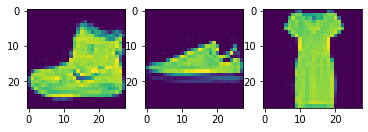

In [8]:
plt.subplot(131)
plt.imshow(X_train[0])
plt.subplot(132)
plt.imshow(X_train[6])
plt.subplot(133)
plt.imshow(X_train[20])

In [9]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [10]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [11]:
nn = models.Sequential()
nn.add(layers.Conv2D(64,(2,2), activation='relu', input_shape=(28,28,1)))
nn.add(layers.MaxPooling2D((2,2)))
nn.add(layers.Conv2D(64,(2,2), activation='relu')) 
nn.add(layers.MaxPooling2D((2,2)))
nn.add(layers.Conv2D(64,(2,2), activation='relu'))
nn.add(layers.Flatten())
nn.add(layers.Dense(512, activation='relu')) 
nn.add(layers.Dropout(0.5)) 
nn.add(layers.Dense(64, activation='relu')) 
nn.add(layers.Dense(10, activation='softmax')) 
nn.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [12]:
val= nn.fit(X_train,y_train,epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
938/938 [==============================] - 60s 64ms/step - loss: 0.5021 - acc: 0.8153 - val_loss: 0.2966 - val_acc: 0.8911
Epoch 2/10
938/938 [==============================] - 60s 64ms/step - loss: 0.3124 - acc: 0.8867 - val_loss: 0.2405 - val_acc: 0.9089
Epoch 3/10
938/938 [==============================] - 62s 66ms/step - loss: 0.2684 - acc: 0.9009 - val_loss: 0.2116 - val_acc: 0.9194
Epoch 4/10
938/938 [==============================] - 61s 65ms/step - loss: 0.2414 - acc: 0.9093 - val_loss: 0.2027 - val_acc: 0.9235
Epoch 5/10
938/938 [==============================] - 59s 63ms/step - loss: 0.2176 - acc: 0.9193 - val_loss: 0.1618 - val_acc: 0.9383
Epoch 6/10
938/938 [==============================] - 57s 61ms/step - loss: 0.2017 - acc: 0.9252 - val_loss: 0.1582 - val_acc: 0.9415
Epoch 7/10
938/938 [==============================] - 57s 61ms/step - loss: 0.1844 - acc: 0.9318 - val_loss: 0.1502 - val_acc: 0.9434
Epoch 8/10
938/938 [==============================] - 61s 65ms

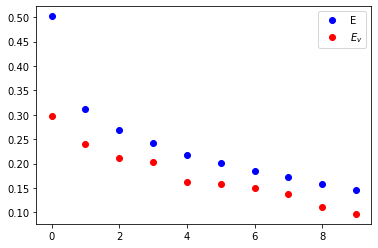

In [13]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

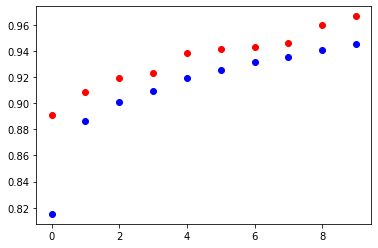

In [14]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [15]:
test_loss, test_acc = nn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2432 - acc: 0.9201


MNIST 패션 이미지에서 MPL의 accuracy 0.8781 loss: 0.3518 이고 CNN은  0.9201, loss: 0.2432 로 나타납니다.
CNN이 MNIST 패션 이미지의 특징을 높은 정확도로 잡는 것을 확인 할 수 있다. MLP는 28*28의 이미지를 학습하여 test를 하고 CNN은 28,28의 1차원 크기로 나뉜 이미지의 특징을 TEST 하여 더 높은 정확도를 보여주는 것을 알 수 있습니다.    